# Learning from Data: Workshop 2

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|23rd January 2015  | **12:00 Monday 9th February 2015** |




Note that both paper (BART) and electronic submissions are required.  Submit a paper copy of your notebook to the Student Services Office and an electronic copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).


Candidate number: ** 033456 **


A proportion (40%) of the module assessment is comprised of reports on the
workshop exercises. The other 60% is assessed by examination in June.
There are three assignments, worth 10%, 15% and 15%  of the total module mark.


Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the reports
You should convert your notebook to printable form, either by downloading it as LaTeX and thence PDF or by printing it directly (see the File menu).  If you use colour make sure that you print in colour or the figures can be easily understood in black and white.

Reports should be handed-in to the Student Services Office with the BART coversheet.  You should also submit the notebook electronically at  <http://empslocal.ex.ac.uk/submit/>.  You just need to submit the single file that is the notebook, so you should be able to upload it directly from the directory on the Blue Room machine.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.


> Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

In [2]:
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
# Find out where the notebook is for submitting it
!pwd
!ls

/Users/sevabaskin/Dropbox/3rd Year/ECM3420 Learning from Data/ipynb
Connecting with the Qt Console.ipynb
Converting Notebooks With nbconvert.ipynb
Custom Keyboard Shortcuts.ipynb
Exeter_intro.ipynb
Importing Notebooks.ipynb
Index.ipynb
JavaScript Notebook Extensions.ipynb
Notebook Basics.ipynb
Notebook Security.ipynb
Numpy and pylab.ipynb
Running Code.ipynb
Running the Notebook Server.ipynb
Typesetting Equations.ipynb
Untitled0.ipynb
Using nbconvert as a Library.ipynb
What is the IPython Notebook.ipynb
Working With Markdown Cells.ipynb
images
linreg.txt
mandelbrot.png
nonlinreg-test.txt
nonlinreg-train.txt
outlier.txt
raw-tremor.txt
tremor.txt
workshop1.ipynb
workshop2.ipynb
workshop3.ipynb
workshop4.ipynb


## Data description  -- scales and standardisation

Download and load a version of the tremor data that you used last week:

In [4]:
try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    !curl -O http://empslocal.ex.ac.uk/people/staff/reverson/ECM3420/raw-tremor.txt
    X = loadtxt('raw-tremor.txt')
print X.shape

(357, 3)


In [5]:
t = X[:,2]
X = X[:,:2]
print t.shape, X.shape

(357,) (357, 2)


(178, 2) (179, 2)


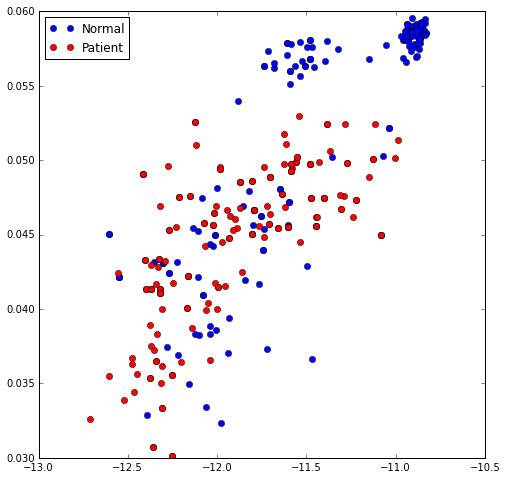

In [6]:
normal = t == 1
patient = t == 0
plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'ro', label='Patient')
legend(loc=2)
print X[normal].shape, X[patient].shape, 

This data is a scaled version of the tremor data. Plot it and note the disparity in the sizes of the data.

> **While both classes contain an almost equal number of observations, there is a clear disparity in the sizes of data once plotted.**

> **Normal class is densely concentrated in the top right corner of the graph and exlcusively occupies it, while Patient class extends and occupies a much wider region of the graph, mostly in the central, upper-central and lower regions of the graph.**

> **In addition to being mostly clustered in the top-right corner, some Normal data is also sparesely spread out in a wide area occupied by the Patient data, but in a significantly smaller quantity than the Patient data. As a result, I would guess that Normal data that is mixed with the Patient data in these central sections of the graph would be much harder to classify and distinguish from Patient data.**

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  **You could plot the location of the centroid on the scatter plot.**

Data mean [-11.62216853   0.04892984]
Data standard deviation [ 0.54510484  0.00777128]

Normal Data mean [-11.34656154   0.05323007]
Normal Data standard deviation [ 0.52683581  0.00757679]

Patient Data mean [-11.89623581   0.04465364]
Patient Data standard deviation [ 0.4073886   0.00516589]


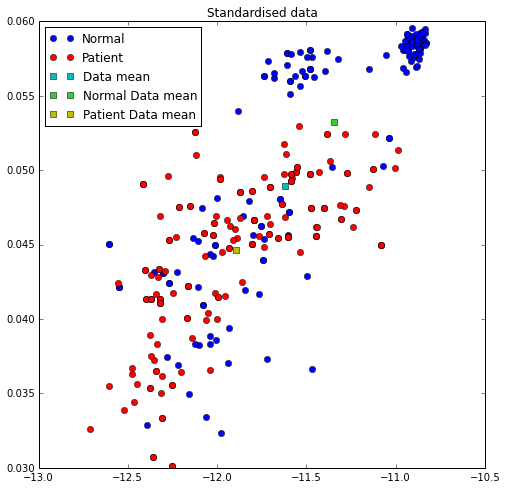

In [7]:
xbar = mean(X, axis=0)
xbarnormal = mean(X[normal,:], axis=0)
xbarpatient = mean(X[patient,:], axis=0)
xstd = std(X, axis=0)
xstdnormal = std(X[normal,:], axis=0)
xstdpatient = std(X[patient,:], axis=0)

plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'ro', label='Patient')
plot(xbar[0], xbar[1], 'cs', label='Data mean')
plot(xbarnormal[0], xbarnormal[1], 's', label='Normal Data mean', color = 'limegreen')
plot(xbarpatient[0], xbarpatient[1], 'ys', label='Patient Data mean')

legend(loc=2)
title('Standardised data')

print 'Data mean', xbar
print 'Data standard deviation', xstd
print
print 'Normal Data mean', xbarnormal
print 'Normal Data standard deviation', xstdnormal
print
print 'Patient Data mean', xbarpatient
print 'Patient Data standard deviation', xstdpatient

### Covariance 

Use the Python command <code>cov</code> to return the covariance matrix.  Check that the diagonal entries are what you expect from the standard deviations.

In [8]:
# covariance matrix for the measured data
cov_raw = cov(X.T)
print cov_raw

# Check that the diagonal entries are what you expect from the standard deviations:
assert allclose(cov_raw[0][1], cov_raw[1][0])

# values on the diagonal are roughly equal to the following variances
print
print cov_raw[0][0], var(X[:,0])
print cov_raw[1][1], var(X[:,1])

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]

0.297973949661 0.297139288738
6.05623796959e-05 6.03927371758e-05


Write a loop to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.

In [9]:
def my_cov(X):
    x1bar = mean(X[:, 0], axis=0)
    x2bar = mean(X[:, 1], axis=0)
    N = X[:, 0].size
    cov_sum = 0
    for idx, row in enumerate(X):
        cov_sum += (row[0]-x1bar)*(row[1]-x2bar)
    x_cov = cov_sum/(N-1)
    return array([[var(X[:, 0]), x_cov], [x_cov, var(X[:, 1])]])

# Manually computed covariance matrix VS numpy's covariance matrix (measured data)
print my_cov(X)
print cov(X.T)

[[  2.97139289e-01   3.57549241e-03]
 [  3.57549241e-03   6.03927372e-05]]
[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


> **The results produced using my_cov() and Python's cov() are roughly the same, although they do deviate a bit (usually after 3 decimal places)**

### Standardisation

Standardise the data by mean-centring it and dividing by the
standard deviation of the relevant variable. (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.)
Plot the standardised data
and check your result by finding its mean and covariance matrix.



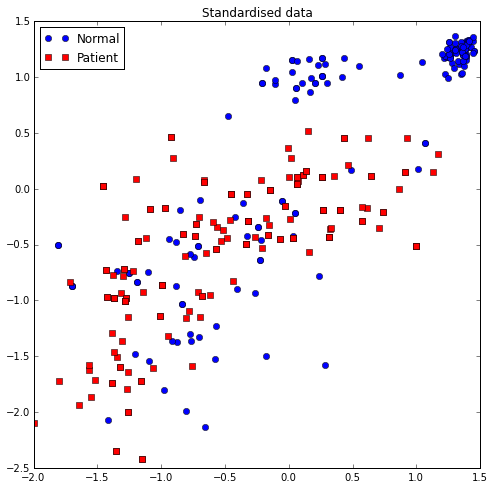

In [10]:
xbar = mean(X, axis=0)
xstd = std(X, axis=0)

Xstd = (X-xbar)/xstd

plot(Xstd[normal,0], Xstd[normal,1], 'bo', label='Normal')
plot(Xstd[patient,0], Xstd[patient,1], 'rs', label='Patient')
legend(loc=2)
title('Standardised data')

In [11]:
# Check your result by finding its mean and covariance matrix
# 1) mean of standardised data should equal 0:
assert allclose(mean(Xstd.T), 0)

# 2) covariance matrix for the standardised data
print 'Covariance matrix:\n', cov(Xstd.T)
assert allclose(cov(Xstd.T)[0][1], cov(Xstd.T)[1][0])
assert allclose(cov(Xstd.T)[0][0], cov(Xstd.T)[1][1])
print
print "Variances along the diagonal should be roughly equal to one, and they are:"
print cov(Xstd.T)[0][0], cov(Xstd.T)[1][1]

Covariance matrix:
[[ 1.00280899  0.84404085]
 [ 0.84404085  1.00280899]]

Variances along the diagonal should be roughly equal to one, and they are:
1.00280898876 1.00280898876


Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data.

In [12]:
# print corrcoef(Xstd[normal,1], Xstd[patient,1])
# 
print "correlation between x1 & x2 extracted from standardised covariance matrix produced by cor(): ", cov(Xstd.T)[0][1]
print "correlation between x1 & x2 extracted from standardised covariance matrix produced by corrcoef(): ", corrcoef(Xstd.T)[0][1]


correlation between x1 & x2 extracted from standardised covariance matrix produced by cor():  0.84404084521
correlation between x1 & x2 extracted from standardised covariance matrix produced by corrcoef():  0.841676585139


Now use the k-nn classifier that you wrote in the last workshop to classify the *raw* data.  You will have to divide the data into a training and a test set.  Find the accuracy on the test set.  Either use k=1 or find the best k by trying a range of k as you did before.

Accuracy of predictions for k=1:  0.776536312849


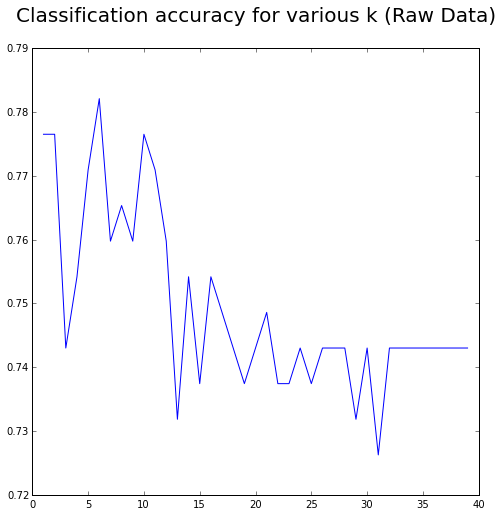

In [16]:
# CLASIFY RAW DATA
import scipy.stats
import scipy.spatial.distance

# KNN classifier from previous workshop
def knn(Xtr, ttr, X, k, plotDistances=False):
    distances = scipy.spatial.distance.cdist(X, Xtr)
    # plot the matrix of distances between X and Xtr if asked
    if plotDistances:
        imshow(distances, interpolation='nearest')
    # tpc stores predicated class for each point in Xtr
    tpc = array([]) # instantiate tcp as an array
    # loop over distances from each point in test data to every point in training data
    for idx, row in enumerate(distances):
        # get indexes of the k closest points
        sorted = argsort(row)[:k]
        # get target values of the k closest points
        k_neighbours = ttr[sorted]
        # find the prevalent target value among k neighbors to classify current point
        mode_val = scipy.stats.mode(k_neighbours)[0][0]
        # append determined classification value to the tpc array
        tpc = np.append(tpc, mode_val)
    return tpc

# split data into training and test sets
from random import shuffle
N = len(t)
I = range(N)
shuffle(I)

tr = I[:N//2]
te = I[N//2:]

# training set
Xtr = X[tr,:]
ttr = t[tr]

# testing set
Xte = X[te,:]
tte = t[te]


# define function to compute accuracy of a particular knn classification
def accuracy_for_k(t, knn):
    # divide number of accurate predictions by total number of predictions
    return sum(t == knn) / float(len(t))

# Find accuracy on the the test set
print "Accuracy of predictions for k=1: ", accuracy_for_k(tte, knn(Xtr, ttr, Xte, 1))

# find best k value on a range of k's
k_arr = array([]) # array of accuracies for different k values
for k in xrange(1, 40):
    accuracy = accuracy_for_k(tte, knn(Xtr, ttr, Xte, k))
    k_arr = append(k_arr, accuracy)
    
figure()
title('Classification accuracy for various k (Raw Data)\n', fontsize=20)
plot(xrange(1, 40), k_arr)

> **Having run this code several times $k=1$ has usually shown the best accuracy in the top $70\%s$, lower $80\%s$. The accuracy then drops for $k>1$.  The *"Classification accuracy for various k"* graph above clearly illustrates this arguement.**

Find the mean and standard deviations of the *training* data and use these to standardise the training data.  Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

Plot your standardised data.

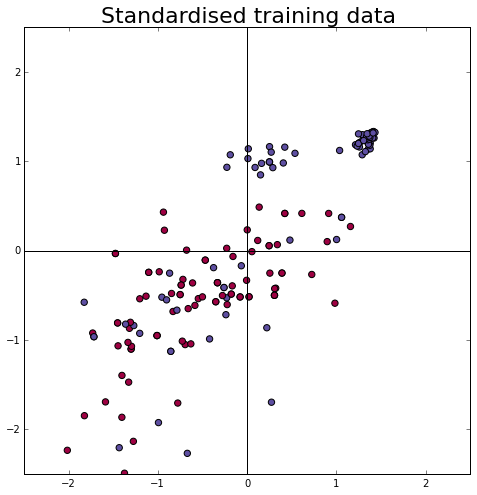

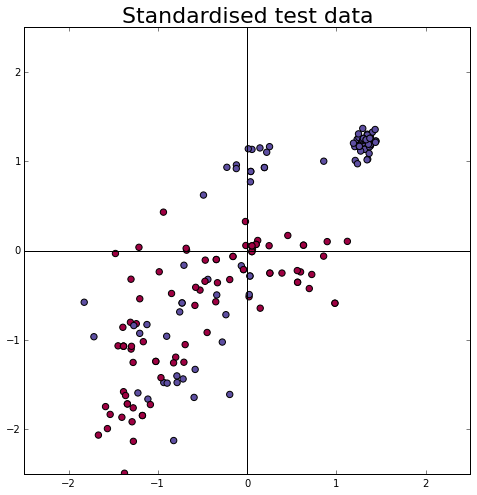

In [14]:
# Find the mean and standard deviations of the training data and use these to standardise the training data
xtr_bar = mean(Xtr, axis=0)
xtr_std = std(Xtr, axis=0)
Xtr_std = (Xtr-xtr_bar)/xtr_std

# Use the training data mean and standard deviation to standardise the test data
Xte_std = (Xte-xtr_bar)/xtr_std

title('Standardised training data', fontsize=22)
scatter(Xtr_std[:,0], Xtr_std[:,1], s=40, c=ttr, cmap=cm.Spectral)
ylim(-2.5, 2.5)
xlim(-2.5, 2.5)
axhline(0, color='black')
axvline(0, color='black')

figure()

title('Standardised test data', fontsize=22)
scatter(Xte_std[:,0], Xte_std[:,1], s=40, c=tte, cmap=cm.Spectral)
ylim(-2.5, 2.5)
xlim(-2.5, 2.5)
axhline(0, color='black')
axvline(0, color='black')

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

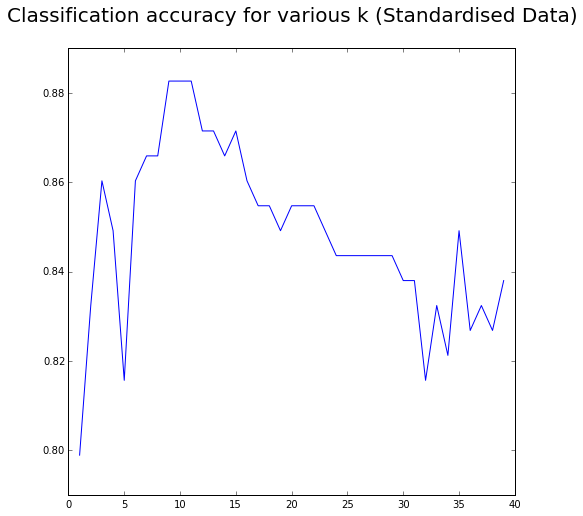

In [1190]:
# find best k value on a range of k's using standardised data
k_arr = array([]) # array of accuracy for different k values
for k in xrange(1, 40):
    accuracy = accuracy_for_k(tte, knn(Xtr_std, ttr, Xte_std, k))
    k_arr = append(k_arr, accuracy)
    
figure()
title('Classification accuracy for various k (Standardised Data)\n', fontsize=20)
plot(xrange(1, 40), k_arr)

> **The knn classification accuracy using standardised data seems quite a few percent above the accuracy of the raw data. For instance, the volatility range using raw data was usually between $69\%$ and $82\%$. With standardised data, the volatility range is now up in the $80\%s$ and often narrower as well: usually between $80\%-88\%$.**

> **In addition, having ran the code above several times $k=1$ often doesn't yield the top accuracy anymore. Better accuracy is now frequently yielded a few $k's$ away from $k=1$. In case of the graph above, top accuracy of $88\%+$ is achieved at $k=10,11$.**

### Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


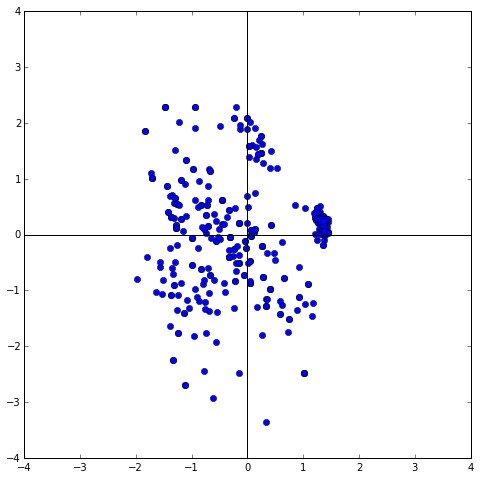

In [1191]:
# Sphere data:
xbar = mean(X, axis=0)
Y = X - xbar
assert allclose(mean(Y, axis=0), 0) # Check is close to 0
S = cov(Y.T)
lmbda, U = eigh(S)
lmbda[lmbda < 0] = 0 # set negative vals to 0
W = dot(U, dot(diag(sqrt(lmbda)), U.T))
assert allclose(dot(W, W), S) # Check W^2 ≈ S
Winv = dot(U, dot(diag(1/sqrt(lmbda)), U.T))
Z = dot(Y, Winv)

ylim(-4, 4)
xlim(-4, 4)
plot(Z[:,0], Z[:,1], 'bo', label='Normal')
axhline(0, color='black')
axvline(0, color='black')

In [1192]:
# Compute the mean and covariance matrix of the sphered data: are they what you expect?
Zbar = mean(Z)
Zvar = var(Z)

print "Mean of Sphered data should be equal to 0 within a tollerance:", allclose(Zbar, 0)
assert allclose(Zbar, 0)
print

print "Variance of the sphered data should roughly be equal to 1:"
print Zvar, "≈", 1
print

print 'Covariance matrix:\n', cov(Z.T)
# assert within a tolerance the equality of values along 2 diagonals in the covariance matrix
assert allclose(cov(Z.T)[0][1], cov(Z.T)[1][0])
assert allclose(cov(Z.T)[0][0], cov(Z.T)[1][1])
print

print "Variances along the diagonal of the sphered data's covariance matrix should be equal to one, and they are:"
print cov(Z.T)[0][0], cov(Z.T)[1][1]
print

print "Covariances in the sphered data's covariance matrix should be equal to zero\nsince all variables are now mutually uncorrelated"
print cov(Z.T)[0][1], cov(Z.T)[1][0]
# assert within a tolerance that covariances in the covariance matrix are equal to zero as expected:
assert allclose(cov(Z.T)[0][1], 0)
assert allclose(cov(Z.T)[1][0], 0)

Mean of Sphered data should be equal to 0 within a tollerance: True

Variance of the sphered data should roughly be equal to 1:
0.997198879552 ≈ 1

Covariance matrix:
[[  1.00000000e+00   1.14764627e-16]
 [  1.14764627e-16   1.00000000e+00]]

Variances along the diagonal of the sphered data's covariance matrix should be equal to one, and they are:
1.0 1.0

Covariances in the sphered data's covariance matrix should be equal to zero
since all variables are now mutually uncorrelated
1.14764627265e-16 1.14764627265e-16


In [1093]:
print corrcoef(Z)

[[ 1. -1. -1. ..., -1. -1.  1.]
 [-1.  1.  1. ...,  1.  1. -1.]
 [-1.  1.  1. ...,  1.  1. -1.]
 ..., 
 [-1.  1.  1. ...,  1.  1. -1.]
 [-1.  1.  1. ...,  1.  1. -1.]
 [ 1. -1. -1. ..., -1. -1.  1.]]


Find the classification accuracy using the sphered data.

Accuracy of predictions for k=1 using test set:  0.854748603352


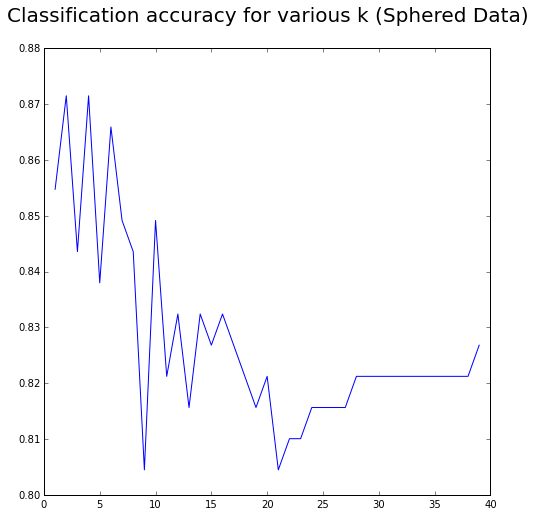

In [1195]:
# split data into training and test sets
from random import shuffle
N = len(t)
I = range(N)
shuffle(I)

tr = I[:N//2]
te = I[N//2:]

# training set
Ztr = Z[tr,:]
z_ttr = t[tr]

# testing set
Zte = Z[te,:]
z_tte = t[te]

# find accuracy on the the test set
print "Accuracy of predictions for k=1 using test set: ", accuracy_for_k(z_tte, knn(Ztr, z_ttr, Zte, 1))

# find best k value on a range of k's
k_arr = array([]) # array of accuracy for different k values
for k in xrange(1, 40):
    accuracy = accuracy_for_k(z_tte, knn(Ztr, z_ttr, Zte, k))
    k_arr = append(k_arr, accuracy)
    
figure()
title('Classification accuracy for various k (Sphered Data)\n', fontsize=20)
plot(xrange(1, 40), k_arr)

> **Classification accuracy of sphered data often ranges in the $80\%s$, is usually better than classification accuracy using raw data and is roughly on par with classification accuracy using standardised data. In sphered data, just as with standardised data, $k-values$ with top accuracies can often be found a few $k's$ away from $k=1$. In case of the graph above top accuracy is achieved at $k=2,4$**

## Classifier using Mahalanobis distances

Use the Mahalanobis distance to construct a classifier that
discriminates between the two classes.

Make plots similar to those in lectures that show the minimum Mahalanobis
  distance from every point in a grid of $(x, y)$ points.  One way of doing
  this is along the following lines

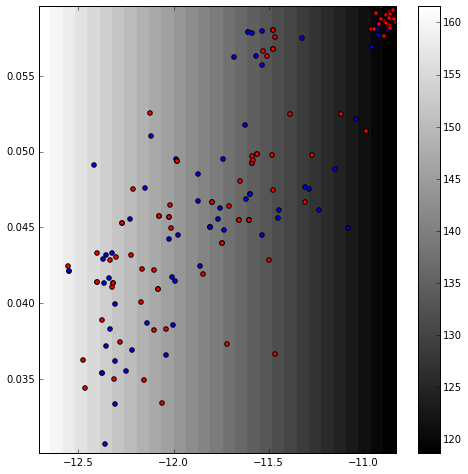

In [1196]:
N = 30;                       # Number of grid points in x direction
M = 40;                       # Number of grid points in y direction
xloc = linspace(X[:,0].min(), X[:,0].max(), N);   # Vector of x coordinates to use
yloc = linspace(X[:,1].min(), X[:,1].max(), M);   # Vector of y coordinates to use
D = zeros((M, N));              # Space for the distances

for nx, x in enumerate(xloc):
    for ny, y in enumerate(yloc):
        D[ny,nx] = x**2
        # Here is where you calculate the minimum Mahalanobis distance 
        # between the point (x, y) and the centre of each of the classes

pcolor(xloc, yloc, D, cmap=cm.gray)  # False colour rendition of D
axis('tight')
colorbar()
# Draw the data.  The names of your variables might be different
I = ttr == 1
scatter(X[I,0], X[I,1], c='b')
I = ttr == 0
scatter(X[I,0], X[I,1], c='r')

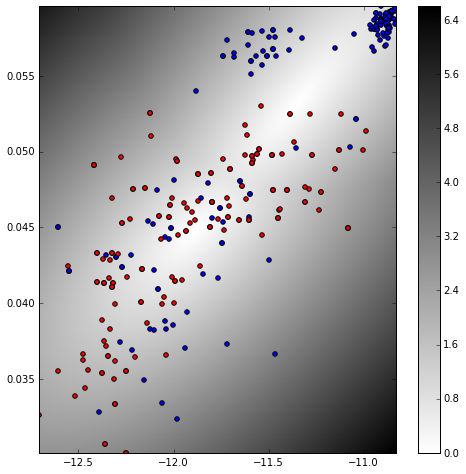

In [1214]:
# Use large N, M for higher resolution shading
N = 400
M = 400
xloc = linspace(X[:,0].min(), X[:,0].max(), N);   # Vector of x coordinates to use
yloc = linspace(X[:,1].min(), X[:,1].max(), M);   # Vector of y coordinates to use
D = zeros((M, N));              # Space for the distances

# comnpute inverse covariance for normal and patient classes
S_normal_inv = linalg.inv(cov(X[normal, :].T))
S_patient_inv = linalg.inv(cov(X[patient, :].T))

for nx, x in enumerate(xloc):
    for ny, y in enumerate(yloc):
        row = array([x,y])
        # Compute Mahalanobis distance for both classes
        D_normal = sqrt(dot((row - xbarnormal), dot(S_normal_inv, ((row - xbarnormal).T))))
        D_patient = sqrt(dot((row - xbarpatient), dot(S_patient_inv, ((row - xbarpatient).T))))
        # Pick the shortest distance among the two
        D[ny,nx] = min([D_normal, D_patient])

pcolor(xloc, yloc, D, cmap=cm.gray_r)  # False colour rendition of D
axis('tight')
colorbar()
# Draw the data.  The names of your variables might be different
I = ttr == 1
scatter(X[normal,0], X[normal,1], c='b')
I = ttr == 0
scatter(X[patient,0], X[patient,1], c='r')

Modify your code so that it not only draws the picture, but it also
classifies data into the two classes.
Find the classification rates (that is, the proportion of examples that
are assigned to the correct class) for the training and test data
<code>Xte</code> and <code>tte</code>. Remember that when you are classifying the
test data, you should use the covariance matrices from the
*training* data to calculate the Mahalanobis distances. Why
are the classification rates for the training and test data different?


In [1213]:
# Note: I've avoided plotting the picture again as to not duplicate code and just wrote a classifying function:

# The classifier assumes data consisting of 2 classes
def mahalanobis_classifier(Xtr, ttr, X):
    # split training data into two classes
    Xtr_normal = Xtr[ttr == 1]
    Xtr_patient = Xtr[ttr == 0]
    
    # find mean and inverse covariance for each class in the training data
    Xtr_xbarnormal = mean(Xtr_normal, axis=0)
    Xtr_xbarpatient = mean(Xtr_patient, axis=0)
    S_tr_normal_inv = linalg.inv(cov(Xtr_normal.T))
    S_tr_patient_inv = linalg.inv(cov(Xtr_patient.T))

    tpc = array([])

    # classify each observation in X based on training data Xtr
    for idx, row in enumerate(X):
        # manually compute Mahalanobis distance for both classes
        D_normal = sqrt(dot((row - Xtr_xbarnormal), dot(S_tr_normal_inv, ((row - Xtr_xbarnormal).T))))
        D_patient = sqrt(dot((row - Xtr_xbarpatient), dot(S_tr_patient_inv, ((row - Xtr_xbarpatient).T))))
        
        # classify observation based on the shortest distance
        classification = (0, 1)[D_normal < D_patient]
        tpc = np.append(tpc, classification)
    return tpc


def accuracy_of_classifier(correct, predicted):
    # divide number of accurate predictions by total number of predictions
    return sum(correct == predicted) / float(len(correct))

print "Accuracy of predictions for training data Xtr, ttr: ", accuracy_of_classifier(ttr, mahalanobis_classifier(Xtr, ttr, Xtr))
print "Accuracy of predictions for test data Xte, tte: ", accuracy_of_classifier(tte, mahalanobis_classifier(Xtr, ttr, Xte))
print "Accuracy diff between Xtr & Xte: ", accuracy_of_classifier(ttr, mahalanobis_classifier(Xtr, ttr, Xtr)) - accuracy_of_classifier(tte, mahalanobis_classifier(Xtr, ttr, Xte))

Accuracy of predictions for training data Xtr, ttr:  0.713483146067
Accuracy of predictions for test data Xte, tte:  0.648044692737
Accuracy diff between Xtr & Xte:  0.06543845333


> **Question:** Why are the classification rates for the training and test data different?

> **Answer:**

> The classification accuracy using training data is 6.5% higher than classification accuracy using test data.

> The difference is likely due to the fact that the means of the training data are used by the classifier to compute Mah. distance and subsequently classify test data. So when classifying training data, its own correct means values are used. Meanwhile, when classifying test data, it is the slighly different means of the training data that are used. Since training data's means might be a bit further from the means of the test data, the prediction regarding closest mean to a test data observation might be slighly off.

A simple modification to your code is to use the ordinary Euclidean distance. How does this change the classification rate?

In [1217]:
# The classifier assumes data consisting of 2 classes
def euclidean_classifier(Xtr, ttr, X):
    # split training data into two classes
    Xtr_normal = Xtr[ttr == 1]
    Xtr_patient = Xtr[ttr == 0]
    
    # find mean and inverse covariance for each class in the training data
    Xtr_xbarnormal = mean(Xtr_normal, axis=0)
    Xtr_xbarpatient = mean(Xtr_patient, axis=0)
    S_tr_normal_inv = linalg.inv(cov(Xtr_normal.T))
    S_tr_patient_inv = linalg.inv(cov(Xtr_patient.T))

    tpc = array([])

    # classify each observation in X based on training data Xtr
    for idx, row in enumerate(X):
        # compute Euclidean distance for both classes
        D_normal = scipy.spatial.distance.euclidean(row, Xtr_xbarnormal)
        D_patient = scipy.spatial.distance.euclidean(row, Xtr_xbarpatient)
        
        # classify observation based on the shortest distance
        classification = (0, 1)[D_normal < D_patient]
        tpc = np.append(tpc, classification)
    return tpc

print "Accuracy of predictions for training data Xtr, ttr: ", accuracy_of_classifier(ttr, euclidean_classifier(Xtr, ttr, Xtr))
print "Accuracy of predictions for test data Xte, tte: ", accuracy_of_classifier(tte, euclidean_classifier(Xtr, ttr, Xte))
print "Accuracy diff between Xtr & Xte: ", accuracy_of_classifier(ttr, euclidean_classifier(Xtr, ttr, Xtr)) - accuracy_of_classifier(tte, euclidean_classifier(Xtr, ttr, Xte))

Accuracy of predictions for training data Xtr, ttr:  0.696629213483
Accuracy of predictions for test data Xte, tte:  0.687150837989
Accuracy diff between Xtr & Xte:  0.00947837549432


> **Answer:**

> **Using Euclidean distance classification accuracy is similar to that of Mahalanobis distance. Superior classification accuracy of training data over test data is maintained. The difference in accuracy between training and test data sets is now just under $1\%$, but the value varies and can go up to $3\%$ with different $Xte, tte, Xtr, ttr, etc$.**

## Classifying digits

Here you'll use your k-nn and Mahalanobis classifiers to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


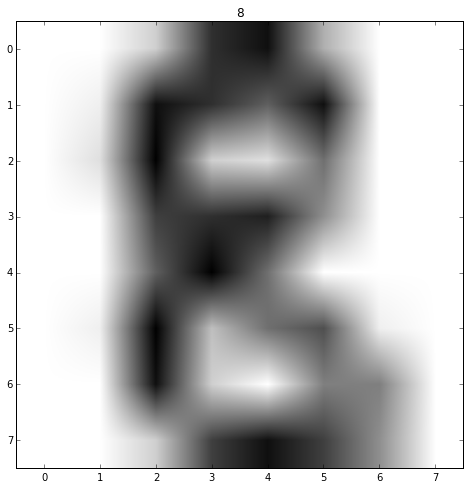

In [1220]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print digits.data.shape

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

In [ ]:
print randint

In [711]:
print randint

<built-in method randint of mtrand.RandomState object at 0x104f4bed0>


As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [1221]:
mydigits = [6, 8]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

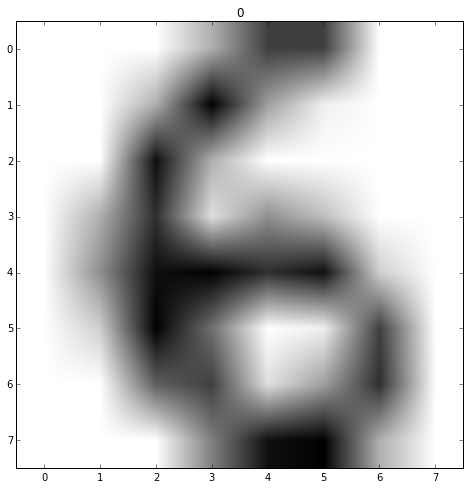

In [1222]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?  Since there are relatively few data points here (about 180 in each class in total) you may find it better to use leave-one-out cross validation. Do the misclassified images look like the other class?

Accuracy of predictions for k=1:  0.994382022472


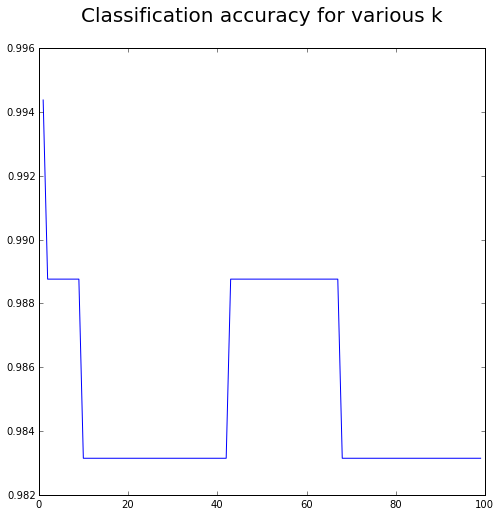

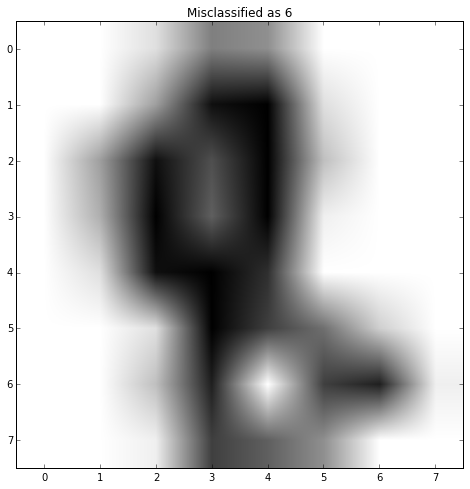

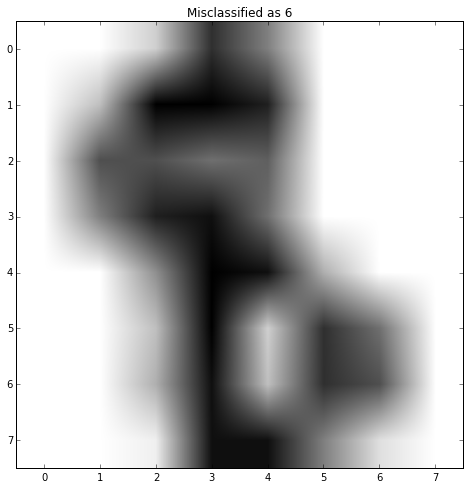

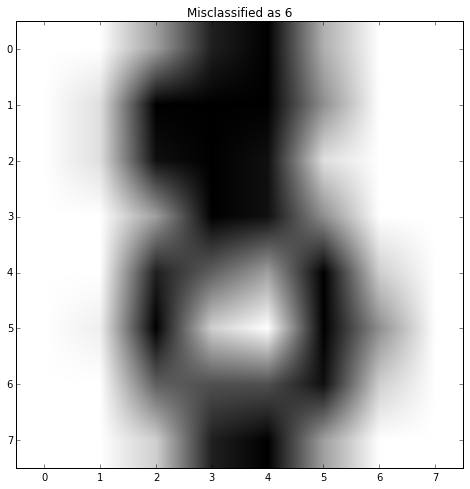

In [1224]:
# split data into training and test sets
N = len(t)
I = range(N)
shuffle(I)

tr = I[:N//2]
te = I[N//2:]

# training set
Xtr = X[tr,:]
ttr = t[tr]

# testing set
Xte = X[te,:]
tte = t[te]

print "Accuracy of predictions for k=1: ", accuracy_for_k(tte, knn(Xtr, ttr, Xte, 1))

# find best k value on a range of k's
k_arr = array([]) # array of accuracy for different k values
for k in xrange(1, 100):
    accuracy = accuracy_for_k(tte, knn(Xtr, ttr, Xte, k))
    k_arr = append(k_arr, accuracy)
    
figure()
title('Classification accuracy for various k\n', fontsize=20)
plot(xrange(1, 100), k_arr)

figure()

# find misclassified immages for k=40
tpc_40 = knn(Xtr, ttr, Xte, 40)

# find location of of misclassified digits
targets_of_misclassified = tte != tpc_40
# locate images of misclassified digits
misclassified_imgs = Xte[targets_of_misclassified]
# find out what their misclassified target value
misclassified_t = tpc_40[targets_of_misclassified]

for idx, image in enumerate(misclassified_imgs):
    title("Misclassified as %d" % mydigits[misclassified_t[idx].astype(int)])
    imshow(reshape(image, (8,8)), cmap=cm.gray_r)
    figure()

> **Question:** Do the misclassified images look like the other class?

> **Answer:** Surprisingly given high accuracy of the overall OCR (99% from the accuracy graph above), the misclassified images do not look like the other class and can be correctly classified by a human.

### Mahalanobis distance classification

It would be nice to use the Mahalanobis distance classifier to classify the digits. However a difficulty arises because we have to find the square root of the covariance matrix S.  With so little data, S is likely to be singular (some zero eigenvalues) and so we'll struggle to invert it. First plot construct the covariance matrix for one of the classes and plot it:

<matplotlib.colorbar.Colorbar instance at 0x28ac6a3f8>

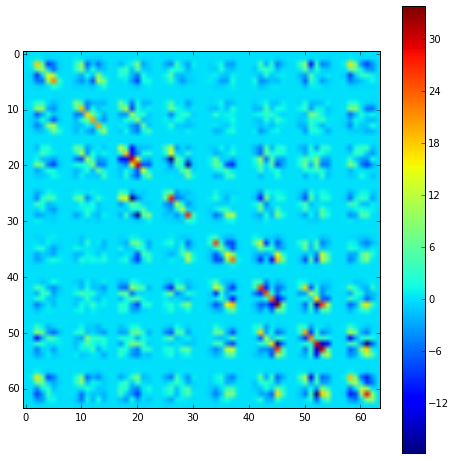

In [1225]:
S = cov(X[t==1,:], rowvar=0)
imshow(S)
colorbar()

This 64 by 64 matrix represents the covariances of each of the 64 pixels in each image with each of the other pixels.  You can see pattern of nearby pixels that are correlated with each other.

However, some of the eigenvalues of the matrix are close to zero (remember that $1 + 10^{-16} = 1 $  in floating point arithmetic).  Here we find and plot the eigenvalues on semi-logarithmic scales.

-4.99686653427e-15 152.44452961


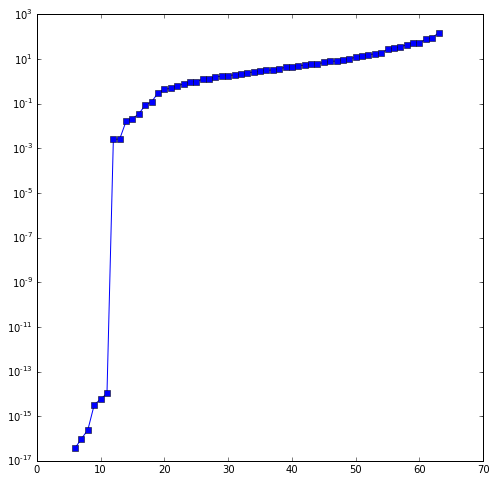

In [1226]:
lmbda, U = eigh(S)
semilogy(lmbda, 's-')
print lmbda.min(), lmbda.max()

One way to avoid the singularity of S is to *regularise* it by adding a diagonal matrix to it: $\hat{S} = S + q I$ where $q$ controls the amount of regularisation.  When $q$ is large, $\hat{S}$ is almost diagonal and so easy to invert; when $q$ is small $\hat{S}$ is very close to $S$ and it doesn't make much difference.  We'll choose $q = 0.1$ and use $\hat{S}$ in place of $S$ when calculating the Mahalanobis distances.  Brutal as it seems, this is quite effective.  Remember you'll need to do this twice, once for each class.   

The plot below shows the eigenvalues of the regularised covariance matrix.

0.1 152.54452961


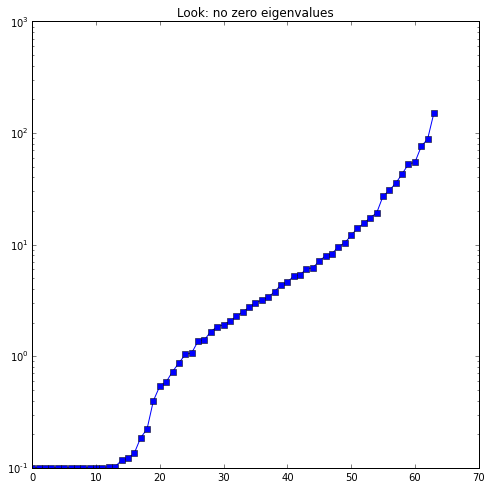

In [1227]:
q = 0.1
Shat = S + q*np.eye(S.shape[0])

lmbda, U = eigh(Shat)
semilogy(lmbda, 's-')
title('Look: no zero eigenvalues')
print lmbda.min(), lmbda.max()

Now use the regularised covariance matrices in place of the singular covariance matrices to construct a Mahalanobis classifier for the digits.  Evaluate its performance.

Accuracy of predictions for training data Xtr, ttr:  1.0
Accuracy of predictions for test data Xte, tte:  0.994382022472
Accuracy diff between Xtr & Xte:  0.00561797752809


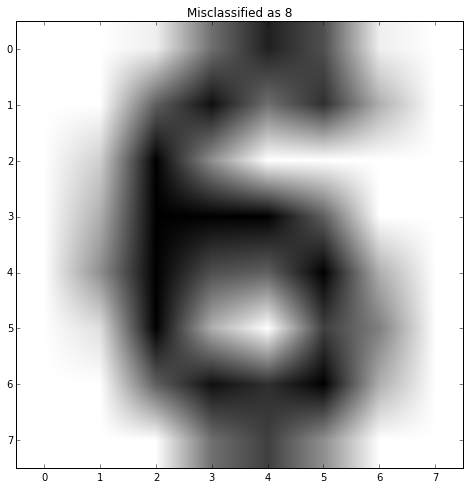

In [1228]:



# split data into training and test sets
N = len(t)
I = range(N)
shuffle(I)

tr = I[:N//2]
te = I[N//2:]

# training set
Xtr = X[tr,:]
ttr = t[tr]

# testing set
Xte = X[te,:]
tte = t[te]


# The classifier assumes data consisting of 2 classes
def mahalanobis_classifier_2(Xtr, ttr, X):
    # split training data into two classes
    Xtr_normal = Xtr[ttr == 1]
    Xtr_patient = Xtr[ttr == 0]
    
    # find mean and inverse covariance for each class in the training data
    Xtr_xbarnormal = mean(Xtr_normal, axis=0)
    Xtr_xbarpatient = mean(Xtr_patient, axis=0)
    
    # find covariances for both classes
    S_tr_normal = cov(Xtr_normal.T)
    S_tr_patient = cov(Xtr_patient.T)
    
    # regularise covariance matrices
    q = 0.1
    S_tr_normal = S_tr_normal + q*np.eye(S_tr_normal.shape[0])
    S_tr_patient = S_tr_patient + q*np.eye(S_tr_patient.shape[0])
    
    S_tr_normal_inv = linalg.inv(S_tr_normal)
    S_tr_patient_inv = linalg.inv(S_tr_patient)

    tpc = array([])

    # classify each observation in X based on training data Xtr
    for idx, row in enumerate(X):
        # manually compute Mahalanobis distance for both classes
        D_normal = sqrt(dot((row - Xtr_xbarnormal), dot(S_tr_normal_inv, ((row - Xtr_xbarnormal).T))))
        D_patient = sqrt(dot((row - Xtr_xbarpatient), dot(S_tr_patient_inv, ((row - Xtr_xbarpatient).T))))
        
        # classify observation based on the shortest distance
        classification = (0, 1)[D_normal < D_patient]
        tpc = np.append(tpc, classification)
    return tpc

print "Accuracy of predictions for training data Xtr, ttr: ", accuracy_of_classifier(ttr, mahalanobis_classifier_2(Xtr, ttr, Xtr))
print "Accuracy of predictions for test data Xte, tte: ", accuracy_of_classifier(tte, mahalanobis_classifier_2(Xtr, ttr, Xte))
print "Accuracy diff between Xtr & Xte: ", accuracy_of_classifier(ttr, mahalanobis_classifier_2(Xtr, ttr, Xtr)) - accuracy_of_classifier(tte, mahalanobis_classifier_2(Xtr, ttr, Xte))


    

# classification using mahalanobis_classifier_2
tpc = mahalanobis_classifier_2(Xtr, ttr, Xte)

# find location of of misclassified digits
targets_of_misclassified = tte != tpc
# locate images of misclassified digits
misclassified_imgs = Xte[targets_of_misclassified]
# find out what their misclassified target value
misclassified_t = tpc[targets_of_misclassified]

for idx, image in enumerate(misclassified_imgs):
    title("Misclassified as %d" % mydigits[misclassified_t[idx].astype(int)])
    imshow(reshape(image, (8,8)), cmap=cm.gray_r)
    figure()

> **Question:**  Do the misclassified images look like the other class?

> **Answer:** Having run Mahalanobis classifier several times, its accuracy seems even higher than that of knn classifier. With knn method, it is possible to get up to 3 misclassified digits quite frequently while Mahalanobis classifier rarely misclassifies even one digit, and even more rarely it misclassifies 2 digits. And the digits it does misclassify seem to have an acceptably tricky shape to classify in the first place. Above is a relatively rare example when Mahalanobis classifier misclassifies one digit.